## Get the data

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
import pandas as pd
import seaborn as sns

In [9]:
iris_df = pd.DataFrame(iris['data'], columns=iris.feature_names)
iris_df['target_int'] = iris['target']
iris_df['target'] = iris_df['target_int'].apply(lambda x: iris['target_names'][x])

## EDA

In [10]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_int,target
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_int
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [20]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target_int         150 non-null    int64  
 5   target             150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


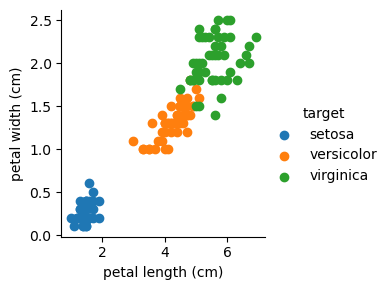

In [15]:
import matplotlib.pyplot as plt
fg = sns.FacetGrid(iris_df, hue='target')
fg.map(plt.scatter, "petal length (cm)", "petal width (cm)")
fg.add_legend()

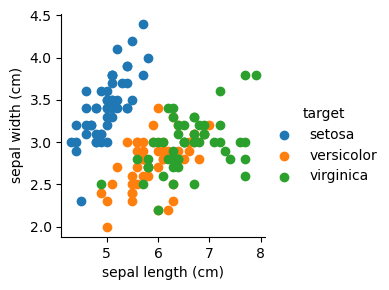

In [16]:
fg = sns.FacetGrid(iris_df, hue='target')
fg.map(plt.scatter, "sepal length (cm)", "sepal width (cm)")
fg.add_legend()

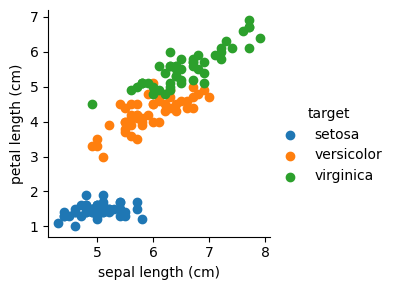

In [18]:
fg = sns.FacetGrid(iris_df, hue='target')
fg.map(plt.scatter, "sepal length (cm)", "petal length (cm)")
fg.add_legend()

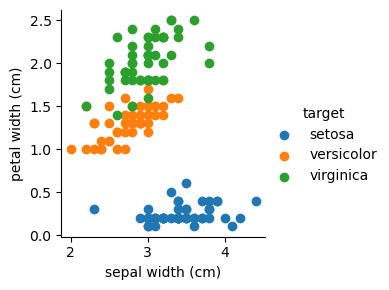

In [19]:
fg = sns.FacetGrid(iris_df, hue='target')
fg.map(plt.scatter, "sepal width (cm)", "petal width (cm)")
fg.add_legend()

In [43]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target_int', 'target'],
      dtype='object')

## Create test/train data

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
train_set, test_set = train_test_split(iris_df, test_size=0.1)

## Train model - Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

### Play around with 2 targets / 2 features (vericolor, setosa, sepal)

In [29]:
iris_df_sv = iris_df.loc[
    (iris_df.target == 'versicolor') | (iris_df.target == 'setosa')
]

In [115]:
X = iris_df_sv.drop(columns=['target', 'target_int', 'petal length (cm)', 'petal width (cm)'])
y = iris_df_sv['target_int']
logistic_regression.fit(X, y)
X.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


#### Visualize decision boundary

In [108]:
import numpy as np

/Users/ssaluja/anaconda3/envs/learnML/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(1.0, 5.380000000000004)

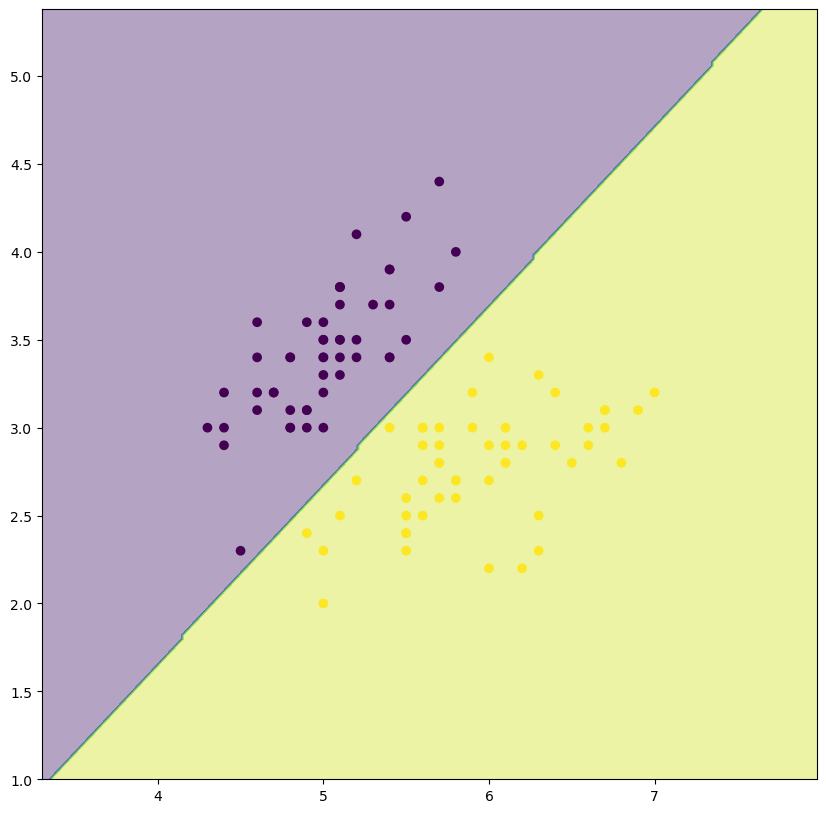

In [111]:
x_min, x_max = X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1 
y_min, y_max = X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), 
                     np.arange(y_min, y_max, 0.02))

Z = logistic_regression.predict(
    np.c_[xx.ravel(), yy.ravel()]
).reshape(xx.shape)

plt.rcParams['figure.figsize']=(10,10) 
plt.figure() 
plt.contourf(xx, yy, Z, alpha=0.4) 
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y) 
plt.xlim(xx.min(), xx.max()) 
plt.ylim(yy.min(), yy.max())

In [101]:
Z.shape

(220, 235)

## Train full model

In [113]:
logistic_regression = LogisticRegression()
logistic_regression

In [118]:
X = iris_df.drop(columns=['target', 'target_int'])
y = iris_df[['target_int']]

In [128]:
train_set_X, test_set_X, train_set_y, test_set_y = train_test_split(X, y, test_size=0.2)

In [132]:
logistic_regression.fit(train_set_X, train_set_y)

/Users/ssaluja/anaconda3/envs/learnML/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### Evaulate fit

In [139]:
score = logistic_regression.score(test_set_X, test_set_y)
print(f"Logistic regression score is {score}")

Logistic regression score is 0.9666666666666667


In [140]:
from sklearn import metrics

In [141]:
predictions = logistic_regression.predict(test_set_X)

cm = metrics.confusion_matrix(test_set_y, predictions)
print(cm)

[[ 9  0  0]
 [ 0 11  1]
 [ 0  0  9]]


### Confusion matrix

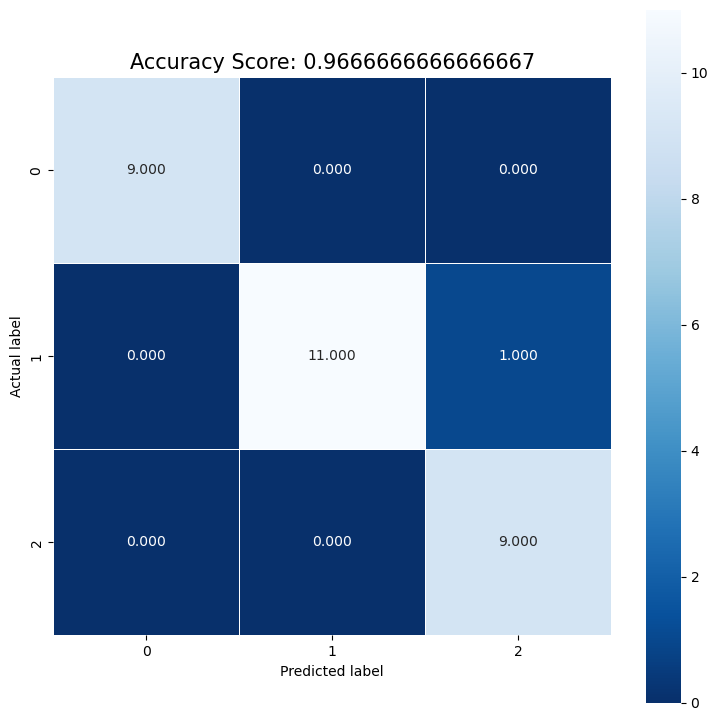

In [142]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);